# Grupo 1
Integrantes: Sofia Vaucelles, Laura S. Gomez Velazquez, María Candela Herrera

# **Introducción**

Un factor crítico durante el proceso de fracturación es la cantidad de agua inyectada, ya que influye directamente en la eficiencia del fracturamiento y en la extracción final de petróleo. En este trabajo, se aplicarán técnicas de ciencia de datos para analizar y optimizar el uso del agua en la fracturación hidráulica.

El dataset utilizado para este análisis es de Datos de fractura de pozos de hidrocarburos y fue obtenido del portal de datos de la Secretaria de Energía de Argentina.

# **Objetivos**

Se llevará a cabo un análisis exploratorio de datos para identificar patrones y relaciones entre las variables de un dataset de datos de fractura de pozos de hidrocarburos. Posteriormente, se entrenarán varios modelos de machine learning para predecir la cantidad óptima de agua a inyectar, con el fin de mejorar la eficiencia del proceso, reducir el impacto ambiental así como también, reducir los costos asociados.

# Análisis Exploratorio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-learn

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
pd.set_option('display.max_columns', None)#Esto es para que muestre todas las columnas sin agregar puntos suspensivos
pozos=pd.read_csv('datos_pozos.csv')

In [ ]:
#montar google drive
#from google.colab import drive
#drive.mount ('/content/drive')

In [ ]:
#pd.set_option('display.max_columns', None) #Para que cuando use el comando head muestre todas las columnas
#ruta_del_archivo = '/content/drive/MyDrive/Proyecto Ciencia de datos/datos_pozos.csv'
#pozos = pd.read_csv(ruta_del_archivo, delimiter = ',') # Importar el archivo CSV

In [ ]:
pozos.shape

(3757, 30)

In [ ]:
pozos.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'sigla', 'cuenca',
       'areapermisoconcesion', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio', 'subtipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp',
       'fecha_inicio_fractura', 'fecha_fin_fractura', 'fecha_data', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga',
       'empresa_informante', 'mes', 'anio'],
      dtype='object')

In [ ]:
pozos.describe()

,id_base_fractura_adjiv,idpozo,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,mes,anio
count,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3706.000000,3757.000000,3757.00000,3757.000000,3757.000000,3757.000000,3757.000000,3757.00000,3757.000000
mean,2293.326324,148043.775087,927.851069,16.302103,3046.442057,404.721766,21921.533509,7.116202,8453.317522,18148.156811,2017.304764,6.46766,2017.348150,6.529678,2020.120043,7.488954,6.46766,2017.304764
std,1301.052583,33767.813641,1168.797773,17.182988,4206.221051,852.807358,31572.930065,42.568072,4929.753505,14768.293864,3.836100,3.41422,3.840768,3.409250,1.598294,2.897834,3.41422,3.836100
min,30.000000,458.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,1.00000,2006.000000,1.000000,2019.000000,1.000000,1.00000,2001.000000
25%,1273.000000,147473.000000,0.000000,2.000000,0.000000,0.000000,274.624000,0.000000,5700.000000,1772.500000,2014.000000,4.00000,2014.000000,4.000000,2019.000000,6.000000,4.00000,2014.000000
50%,2273.000000,158915.000000,0.000000,6.000000,206.055000,34.000000,4614.000000,0.000000,9257.000000,18506.345000,2017.000000,6.00000,2017.000000,7.000000,2019.000000,8.000000,6.00000,2017.000000
75%,3436.000000,162388.000000,2042.000000,30.000000,6502.000000,593.640000,41895.591114,0.000000,11520.133799,30000.000000,2021.000000,9.00000,2021.000000,9.000000,2021.000000,10.000000,9.00000,2021.000000
max,4470.000000,165282.000000,4477.000000,87.000000,17146.998000,11839.640000,537184.600000,560.000000,209640.559334,50000.000000,2024.000000,12.00000,2024.000000,12.000000,2024.000000,12.000000,12.00000,2024.000000


In [ ]:
pozos.head()

,id_base_fractura_adjiv,idpozo,sigla,cuenca,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,fecha_inicio_fractura,fecha_fin_fractura,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante,mes,anio
0,30,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,3,Punzado,0.000,0.000,2718.20,0.0,10190.0,10897.0,2019-04-20,2019-04-30,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.,4,2019
1,31,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,1,Punzado,0.000,0.000,600.00,0.0,9250.0,10251.0,2018-11-02,2018-11-03,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.,11,2018
2,37,159219,YPF.Nq.AdlA-1001(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1437.3,18,Tapón disparo,3761.370,536.850,25768.30,0.0,15000.0,32000.0,2017-11-19,2017-12-14,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
3,38,159220,YPF.Nq.AdlA-1002(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1518.3,19,Tapón disparo,3903.705,558.225,27398.37,0.0,11348.0,32000.0,2017-11-21,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
4,39,159221,YPF.Nq.AdlA-1003(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1482.3,19,Tapón disparo,3949.020,569.925,27157.60,0.0,11076.0,32000.0,2017-11-18,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017


A continuación, se presenta una tabla que sintetiza la información contenida en cada columna del dataset. Esto proporciona un panorama general de los datos disponibles para el análisis.





| Nombre de columna                        | Descripción                                         |
|------------------------------------------|-----------------------------------------------------|
| id_base_fractura_adjiv                   | Identificador único de la fractura                 |
| idpozo                                   | Identificador del pozo                             |
| sigla                                    | Sigla del pozo                                     |
| cuenca                                   | Cuenca donde se encuentra el pozo                  |
| areapermisoconcesion                     | Área de permiso o concesión                        |
| yacimiento                               | Yacimiento                                         |
| formacion_productiva                     | Formación productiva                               |
| tipo_reservorio                          | Tipo de reservorio                                 |
| subtipo_reservorio                       | Subtipo de reservorio                              |
| longitud_rama_horizontal_m               | Longitud de la rama horizontal en metros           |
| cantidad_fracturas                       | Cantidad de fracturas                              |
| tipo_terminacion                         | Tipo de terminación                                |
| arena_bombeada_nacional_tn               | Cantidad de arena bombeada (nacional) en toneladas |
| arena_bombeada_importada_tn              | Cantidad de arena bombeada (importada) en toneladas|
| agua_inyectada_m3                        | Cantidad de agua inyectada en metros cúbicos       |
| co2_inyectado_m3                         | Cantidad de CO2 inyectado en metros cúbicos        |
| presion_maxima_psi                       | Presión máxima aplicada en psi                     |
| potencia_equipos_fractura_hp             | Potencia de los equipos de fractura en caballos de fuerza (hp) |
| fecha_inicio_fractura                    | Fecha de inicio de la fractura                     |
| fecha_fin_fractura                       | Fecha de finalización de la fractura               |
| fecha_data                               | Fecha de registro de los datos                     |
| anio_if                                  | Año de inicio de la fractura                       |
| mes_if                                   | Mes de inicio de la fractura                       |
| anio_ff                                  | Año de finalización de la fractura                 |
| mes_ff                                   | Mes de finalización de la fractura                 |
| anio_carga                               | Año de carga de los datos                          |
| mes_carga                                | Mes de carga de los datos                          |
| empresa_informante                       | Empresa que proporciona la información             |
| mes                                      | Mes de registro                                    |
| anio                                      | Año de registro                                    |


In [ ]:
columnas_seleccionadas = ['longitud_rama_horizontal_m',
        'cantidad_fracturas',
        'arena_bombeada_nacional_tn',
        'arena_bombeada_importada_tn',
        'co2_inyectado_m3',
        'presion_maxima_psi',
        'potencia_equipos_fractura_hp',
        'tipo_reservorio',
        'subtipo_reservorio',
        'tipo_terminacion',
        'fecha_inicio_fractura',
        'fecha_fin_fractura',
        'cuenca',
        'yacimiento',
        'formacion_productiva',
        'empresa_informante', 'agua_inyectada_m3'
    ]
pozos = pozos[columnas_seleccionadas]

In [ ]:
#El tipo de dato de cada columna
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitud_rama_horizontal_m    3757 non-null   float64
 1   cantidad_fracturas            3757 non-null   int64  
 2   arena_bombeada_nacional_tn    3757 non-null   float64
 3   arena_bombeada_importada_tn   3757 non-null   float64
 4   co2_inyectado_m3              3757 non-null   float64
 5   presion_maxima_psi            3757 non-null   float64
 6   potencia_equipos_fractura_hp  3706 non-null   float64
 7   tipo_reservorio               3720 non-null   object 
 8   subtipo_reservorio            2846 non-null   object 
 9   tipo_terminacion              3757 non-null   object 
 10  fecha_inicio_fractura         3757 non-null   object 
 11  fecha_fin_fractura            3757 non-null   object 
 12  cuenca                        3757 non-null   object 
 13  yac

In [ ]:
#cuantos datos nan contiene cada columna
pozos.isna().sum()

longitud_rama_horizontal_m        0
cantidad_fracturas                0
arena_bombeada_nacional_tn        0
arena_bombeada_importada_tn       0
co2_inyectado_m3                  0
presion_maxima_psi                0
potencia_equipos_fractura_hp     51
tipo_reservorio                  37
subtipo_reservorio              911
tipo_terminacion                  0
fecha_inicio_fractura             0
fecha_fin_fractura                0
cuenca                            0
yacimiento                        0
formacion_productiva              0
empresa_informante                0
agua_inyectada_m3                 0
dtype: int64

In [ ]:
#tipos de datos que hay (se toma esta columna por ser una de las que tiene datos faltantes)
pozos['tipo_reservorio'].unique()

array(['NO CONVENCIONAL', nan, 'CONVENCIONAL', 'NO DISCRIMINADO'],
      dtype=object)

In [ ]:
#cuantos valores hay de cada tipo
pozos['tipo_reservorio'].value_counts()

tipo_reservorio
NO CONVENCIONAL    2851
CONVENCIONAL        868
NO DISCRIMINADO       1
Name: count, dtype: int64

In [ ]:
#Los tipos de reservorios convencional no tienen subtipos
#Cuantos valores nan en el subtipo de resevorio hay en las filas que tengan reservorio convencional
convencionales_vacios=(pozos['tipo_reservorio']== 'CONVENCIONAL') & (pozos['subtipo_reservorio']).isna()
convencionales_vacios.sum()

868

In [ ]:
#Remplazo los valores de nan por 'no aplica' en los subtipos de reservorios relacionados a los tipos de reservorio convencionales,
#ya que los tipos convencionales no tienen subtipos
pozos.loc[convencionales_vacios, 'subtipo_reservorio'] = pozos.loc[convencionales_vacios, 'subtipo_reservorio'].fillna('no aplica')

In [ ]:
pozos['subtipo_reservorio'].unique()

array(['SHALE', 'TIGHT', nan, 'no aplica'], dtype=object)

In [ ]:
#Chequeo mis valores de nan y me fijo especificamente en subtipo de reservorio, tendría que haber 868 nan menos
pozos.isna().sum()

longitud_rama_horizontal_m       0
cantidad_fracturas               0
arena_bombeada_nacional_tn       0
arena_bombeada_importada_tn      0
co2_inyectado_m3                 0
presion_maxima_psi               0
potencia_equipos_fractura_hp    51
tipo_reservorio                 37
subtipo_reservorio              43
tipo_terminacion                 0
fecha_inicio_fractura            0
fecha_fin_fractura               0
cuenca                           0
yacimiento                       0
formacion_productiva             0
empresa_informante               0
agua_inyectada_m3                0
dtype: int64

Se chequea cual es el porcentaje Nan de las columnas que lo continen. Posteriormente estos datos van a ser tratados.

In [ ]:
pozos['tipo_reservorio'].isnull().sum()/len(pozos)*100

0.9848283204684588

In [ ]:
pozos['subtipo_reservorio'].isnull().sum()/len(pozos)*100

1.1445302102741548

In [ ]:
pozos['potencia_equipos_fractura_hp'].isnull().sum()/len(pozos)*100

1.3574660633484164

In [ ]:
pozos['tipo_reservorio'].unique()

array(['NO CONVENCIONAL', nan, 'CONVENCIONAL', 'NO DISCRIMINADO'],
      dtype=object)

In [ ]:
#Se rellenan los datos nan con los datos que mas se repiten
pozos['tipo_reservorio'].fillna(pozos['tipo_reservorio'].mode()[0], inplace=True)

In [ ]:
pozos['tipo_reservorio'].value_counts()

tipo_reservorio
NO CONVENCIONAL    2888
CONVENCIONAL        868
NO DISCRIMINADO       1
Name: count, dtype: int64

In [ ]:
# Filtrar las filas donde 'tipo_reservorio' es 'no discriminado'
filtro = pozos[pozos['tipo_reservorio'] == 'no discriminado']
# Mostrar el valor en 'subtipo_reservorio' para esta fila
print(filtro['subtipo_reservorio'])

Series([], Name: subtipo_reservorio, dtype: object)


No hay un valor en la columna subtipo_reservorio para la fila 'No discrimindo' de la columna tipo_reservorio. Por lo que el valor que se asignará el valor de convencional.

In [ ]:
# Reemplazar 'no discriminado' por 'convencional' en la columna 'tipo_reservorio'
pozos['tipo_reservorio'].replace('NO DISCRIMINADO', 'CONVENCIONAL', inplace=True)

In [ ]:
pozos['tipo_reservorio'].unique()

array(['NO CONVENCIONAL', 'CONVENCIONAL'], dtype=object)

In [ ]:
pozos['subtipo_reservorio'].unique()

array(['SHALE', 'TIGHT', nan, 'no aplica'], dtype=object)

In [ ]:
#Se rellenan los datos nan con los datos que mas se repiten
pozos['subtipo_reservorio'].fillna(pozos['subtipo_reservorio'].mode()[0], inplace=True)

In [ ]:
pozos.isna().sum()

longitud_rama_horizontal_m       0
cantidad_fracturas               0
arena_bombeada_nacional_tn       0
arena_bombeada_importada_tn      0
co2_inyectado_m3                 0
presion_maxima_psi               0
potencia_equipos_fractura_hp    51
tipo_reservorio                  0
subtipo_reservorio               0
tipo_terminacion                 0
fecha_inicio_fractura            0
fecha_fin_fractura               0
cuenca                           0
yacimiento                       0
formacion_productiva             0
empresa_informante               0
agua_inyectada_m3                0
dtype: int64

Hasta este punto se han remplazado los datos faltantes en las columnas categoricas debido a que representaban menos del 10% del Dataset por lo que esos no generaría ruido ni modificaría la tendencia.

In [ ]:
for columna in pozos.columns:
    print(f'{columna}:{pozos[columna].unique()}\n')

longitud_rama_horizontal_m:[   0.  1437.3 1518.3 ... 3931.  3149.  4018. ]

cantidad_fracturas:[ 3  1 18 19 25 15 27 35 34 31  5 24 20 23 26 14  4 10  6 17  8 22 21 13
 16 30 32 38  7  9 29 28 39 40 11  2 12 37 33 41 36 58 48 57 70 71 60 50
 59 49 63 43 52 54 47 44 42 51 56 46 53 45 62 61 68 55 65 72 64 67 66 73
 87]

arena_bombeada_nacional_tn:[    0.      3761.37    3903.705  ... 15343.7193 11334.0087 14688.0423]

arena_bombeada_importada_tn:[   0.     536.85   558.225 ... 1290.42  1122.66  1620.495]

co2_inyectado_m3:[  0.   301.   207.   309.   293.   320.   458.   196.    76.   375.
 267.   287.   306.   270.   266.   221.   236.   316.   342.   115.
 233.   255.   121.    87.    83.   247.   144.   315.   340.   275.
 420.   206.   242.   204.   290.   308.   217.    49.   462.    62.
 280.   286.   253.   381.    51.   103.   199.    79.   178.   110.
 254.   279.   380.    59.   114.    53.   116.    48.    42.    65.
 106.    57.    80.    91.   166.    37.   227.   129.    93

Dado el contexto del dataset y el objetivo de analizar la cantidad de agua inyectada en pozos con fractura hidráulica, al ver los datos decada columna, se observa que hay valores de cero en lau longitud de rama horizontal los cuales podrían no ser representativos de los pozos de interés.

In [ ]:
pozos['longitud_rama_horizontal_m'].value_counts()

longitud_rama_horizontal_m
0.0       1976
3.0         44
2000.0      27
1500.0      22
3000.0      15
          ... 
59.0         1
51.0         1
49.0         1
68.0         1
4018.0       1
Name: count, Length: 1262, dtype: int64

In [ ]:
#valores de co2 cuando hay filas con 0 en la columna de longitud rama horizontal
pozos['co2_inyectado_m3'].value_counts()

co2_inyectado_m3
0.0      3598
49.0        4
64.0        3
51.0        3
68.0        3
         ... 
253.0       1
286.0       1
280.0       1
62.0        1
190.0       1
Name: count, Length: 132, dtype: int64

In [ ]:
#Elimino las filas que contienen 0 en la columna de longitud de la rama horizontal
pozos = pozos[pozos['longitud_rama_horizontal_m'] != 0]

In [ ]:
#Valores al eliminar las filas que contienen 0
pozos['longitud_rama_horizontal_m'].value_counts()

longitud_rama_horizontal_m
3.0       44
2000.0    27
1500.0    22
3000.0    15
2500.0    11
          ..
51.0       1
49.0       1
68.0       1
1306.0     1
4018.0     1
Name: count, Length: 1261, dtype: int64

In [ ]:
#valores de co2 cuando se eliminan filas con 0 en la columna de longitud rama horizontal
pozos['co2_inyectado_m3'].value_counts()

co2_inyectado_m3
0.0    1781
Name: count, dtype: int64

In [ ]:
pozos.describe()

,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,agua_inyectada_m3
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.0,1781.000000,1730.000000,1781.000000
mean,1957.291672,29.158899,6105.204312,512.029991,0.0,10742.892479,26701.926895,42264.508369
std,930.887843,16.029468,4120.239860,1155.985257,0.0,5446.240439,14048.666686,33168.995066
min,0.600000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1437.000000,18.000000,2956.904550,0.000000,0.0,10896.000000,19328.750000,21851.000000
50%,2090.000000,31.000000,6625.000000,0.000000,0.0,11500.141992,32000.000000,42271.368496
75%,2562.000000,40.000000,9144.526500,606.960000,0.0,12000.000000,40000.000000,59042.605100
max,4477.000000,87.000000,17146.998000,11839.640000,0.0,209640.559334,50000.000000,537184.600000


Después de eliminar la filas con valores 0 en la columna de longitud de la rama horizontal, se observa que los valores restantes en las filas de CO2 son iguales a 0, por lo que esa columna se eliminarán.

In [ ]:
pozos = pozos.drop(columns=['co2_inyectado_m3'])

Lo siguiente que se hará es checar los datos nulos de las columnas que contienen datos numéricos, en este caso corresponde a la columna de **potencia de equipos de fractura**

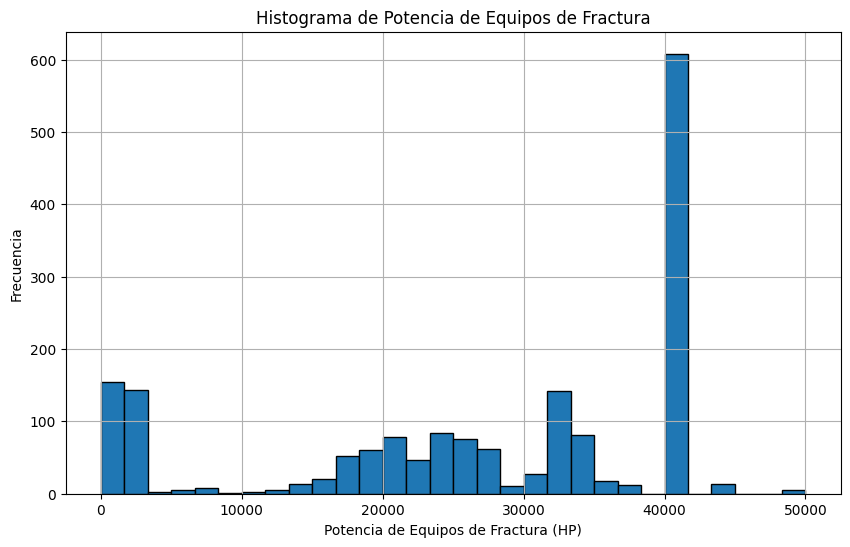

In [ ]:
# Crear el histograma para la columna de potencia de equipos de fractura
plt.figure(figsize=(10, 6))
plt.hist(pozos['potencia_equipos_fractura_hp'], bins=30, edgecolor='black')
plt.title('Histograma de Potencia de Equipos de Fractura')
plt.xlabel('Potencia de Equipos de Fractura (HP)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
# Calcular la moda
mode_value = pozos['potencia_equipos_fractura_hp'].mode()[0]

# Calcular la mediana
median_value = pozos['potencia_equipos_fractura_hp'].median()

# Calcular la media
mean_value = pozos['potencia_equipos_fractura_hp'].mean()

print("Moda:", mode_value)
print("Mediana:", median_value)
print("Media:", mean_value)

Moda: 40000.0
Mediana: 32000.0
Media: 26701.926895196528


De acuerdo a lo observado en el histograma, se remplazaran los valores de NAN con el valor de la moda 40000 es el valor mas común de la muestra.

In [ ]:
pozos['potencia_equipos_fractura_hp'].fillna(pozos['potencia_equipos_fractura_hp'].mode()[0], inplace=True)

In [ ]:
pozos['potencia_equipos_fractura_hp'].isna().sum()

0

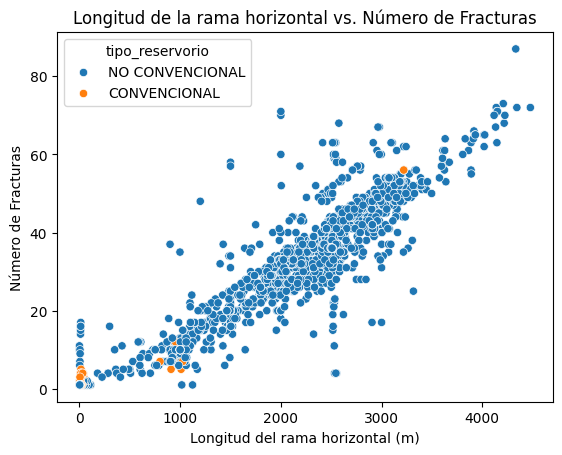

In [ ]:
# Crear el gráfico de dispersión con Seaborn
sns.scatterplot(data=pozos, x='longitud_rama_horizontal_m', y='cantidad_fracturas', hue='tipo_reservorio')

# Añadir título y etiquetas de ejes
plt.title('Longitud de la rama horizontal vs. Número de Fracturas')
plt.xlabel('Longitud del rama horizontal (m)')
plt.ylabel('Número de Fracturas')

# Mostrar el gráfico
plt.show()

De acuerdo con este gráfico, hay una correlación en la longitud del reservorio con respecto al número de fracturas. Con esta tendencia lineal, podemos estimar la frecuencia de fracturación, es decir, a qué distancia aproximada se espera que ocurra una fractura

Se observan valores de longitud del reservorio iguales a 0, lo cual no tiene sentido, probablemente debido a la falta de registro de esos datos. Existen dos maneras de abordar este problema:

Dado que se presenta una tendencia lineal, se podrían reasignar los valores de longitud del reservorio siguiendo dicha tendenci a. Otra opción es eliminar estos valores, ya que son pocos y no tienen un peso significativo en el análiststos

Por otro lado, en los tipos de reservorio, el mayor el numero de datos son del tipo 'no convencional', por lo que es conveniente separar los graficos por tipo de categoría para tener una mejor visualización

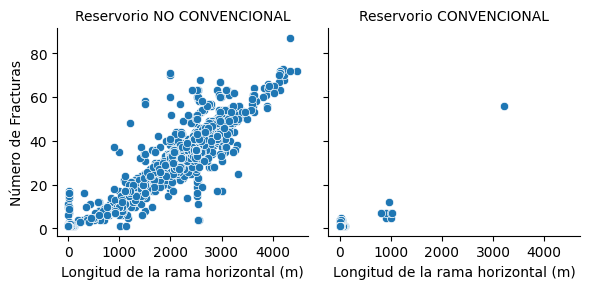

In [ ]:
# Crear un FacetGrid con Seaborn
g = sns.FacetGrid(pozos, col='tipo_reservorio')
g.map_dataframe(sns.scatterplot, x='longitud_rama_horizontal_m', y='cantidad_fracturas')

# Ajustar las etiquetas de los ejes y el título
g.set_axis_labels('Longitud de la rama horizontal (m)', 'Número de Fracturas')
g.set_titles('Reservorio {col_name}')

# Mostrar los gráficos
plt.show()

Cual sería la relación de la cantidad de fracturas con los subtipos de reservorio, en este caso los de la categoria no aplica, corresponden a los reservorios de tipo convencional

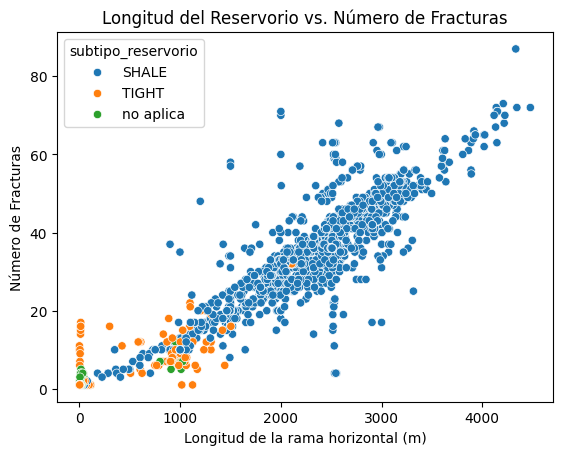

In [ ]:
# Crear el gráfico de dispersión con Seaborn
sns.scatterplot(data=pozos, x='longitud_rama_horizontal_m', y='cantidad_fracturas', hue='subtipo_reservorio')

# Añadir título y etiquetas de ejes
plt.title('Longitud del Reservorio vs. Número de Fracturas')
plt.xlabel('Longitud de la rama horizontal (m)')
plt.ylabel('Número de Fracturas')

# Mostrar el gráfico
plt.show()

El mayor numero de subtipo de reservoio corresponde al subtipo shale, por lo que al igual que la relación anterior (longitud de la rama horizontal vs numero de fracturas), se separarán los gráficos para tener una visualización.

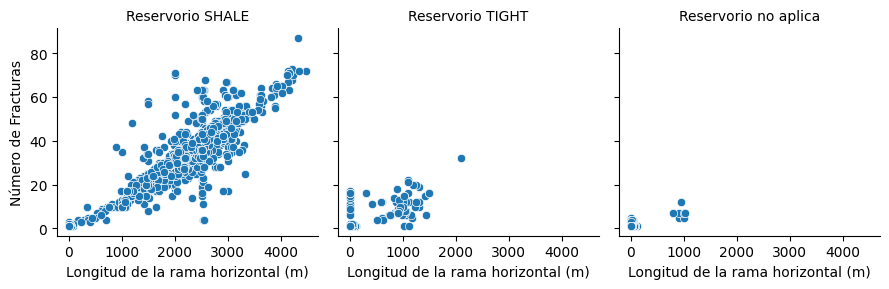

In [ ]:
# Crear un FacetGrid con Seaborn
g = sns.FacetGrid(pozos, col='subtipo_reservorio')
g.map_dataframe(sns.scatterplot, x='longitud_rama_horizontal_m', y='cantidad_fracturas')

# Ajustar las etiquetas de los ejes y el título
g.set_axis_labels('Longitud de la rama horizontal (m)', 'Número de Fracturas')
g.set_titles('Reservorio {col_name}')

# Mostrar los gráficos
plt.show()

De estos gráficos se puede ver que los subtipos de reservorios shale son los que más se han enontrado. Además son de mayor longitud por lo que presentan un mayor numero de fractura. Esto tiene que ver ya que, los tight y los shale son ambos del tipo no convencional pero uno se encuentra en una región más localizada en la cuenca y el otro en cambio, se distribuye a lo largo de esta.

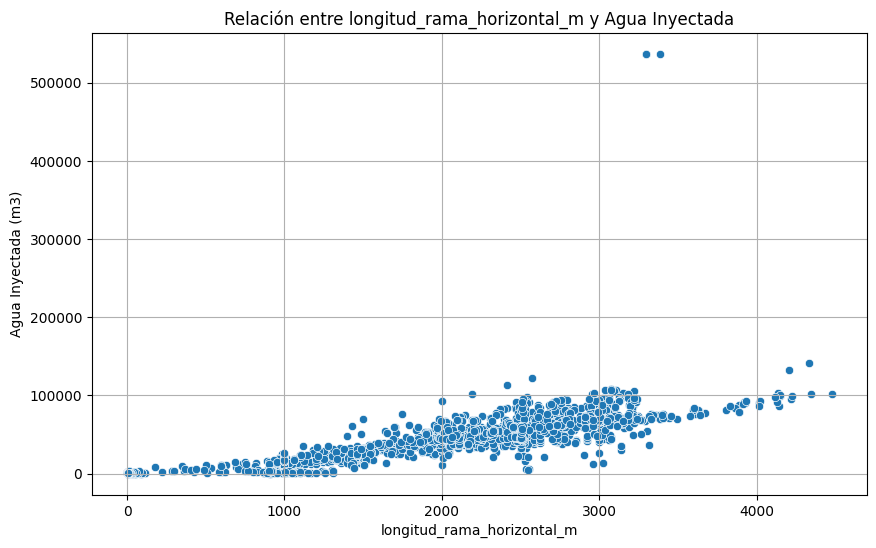

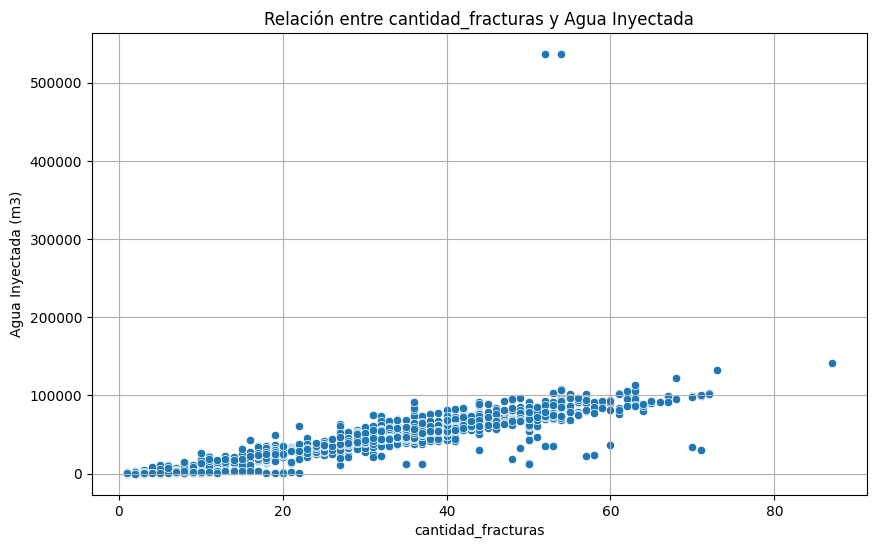

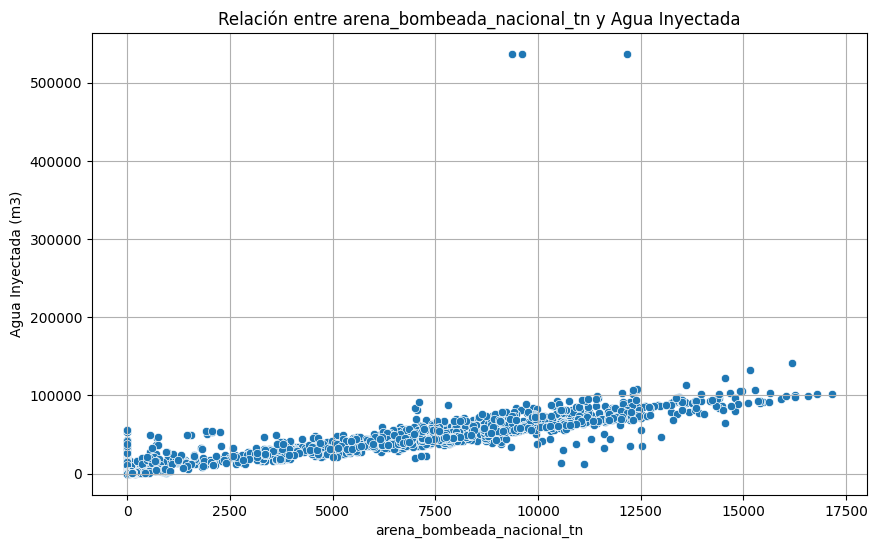

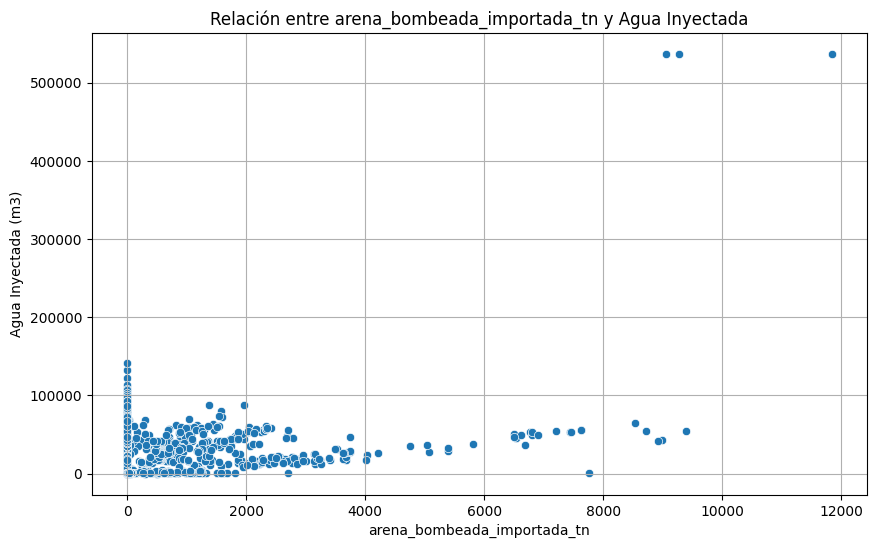

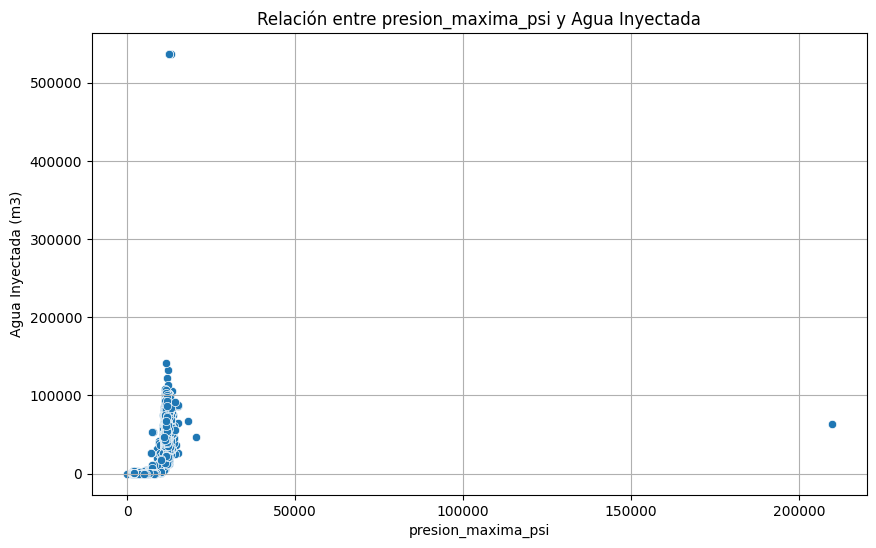

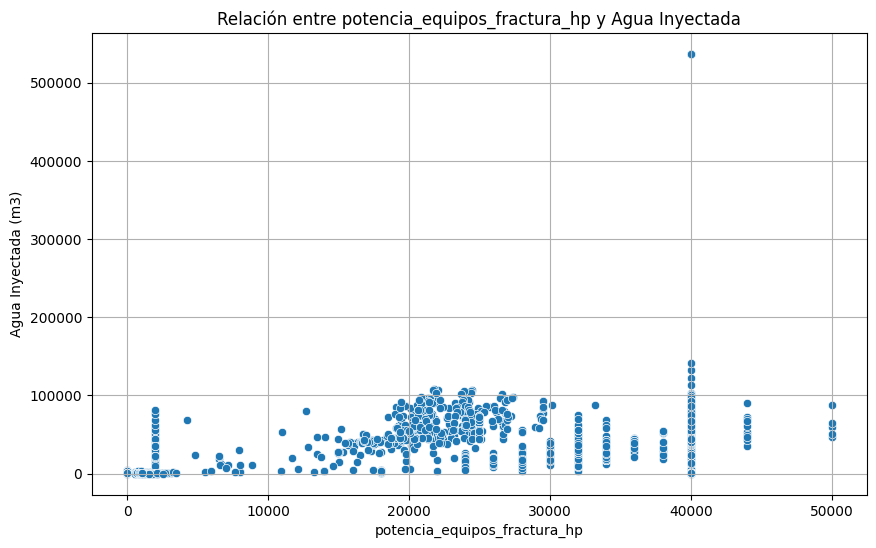

In [ ]:
# Columnas numéricas
numeric_columns = ['longitud_rama_horizontal_m',
                   'cantidad_fracturas',
                   'arena_bombeada_nacional_tn',
                   'arena_bombeada_importada_tn',
                   'presion_maxima_psi',
                   'potencia_equipos_fractura_hp']

# Crear scatter plots
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pozos[col], y=pozos['agua_inyectada_m3'])
    plt.title(f'Relación entre {col} y Agua Inyectada')
    plt.xlabel(col)
    plt.ylabel('Agua Inyectada (m3)')
    plt.grid(True)
    plt.show()

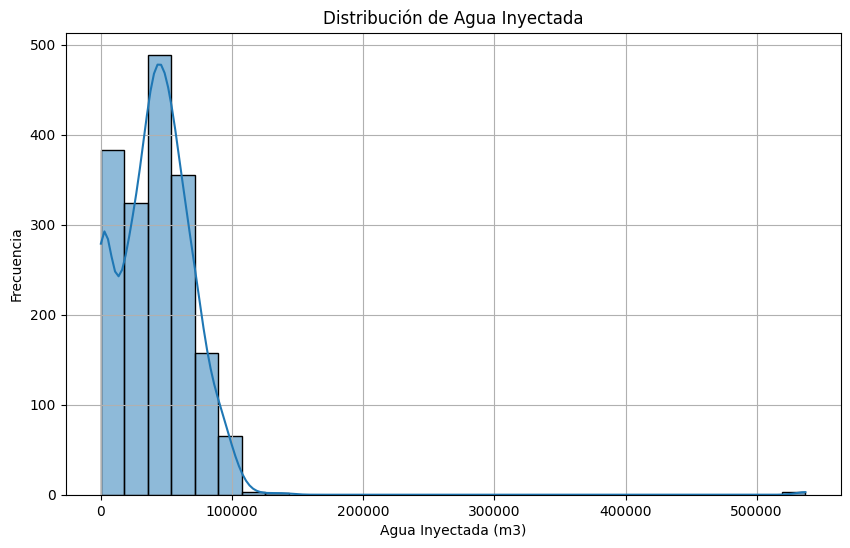

In [ ]:
#Histograma para ver la cantidad de agua inyectada
plt.figure(figsize=(10, 6))
sns.histplot(pozos['agua_inyectada_m3'], bins=30, kde=True)
plt.title('Distribución de Agua Inyectada')
plt.xlabel('Agua Inyectada (m3)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

En el gráfico se de presión máxima vs agua inyectada, se observa un valor valor atipico cerca de 200000 de psi, por lo que se eliminará ese valor para no generar ruido.

In [ ]:
pozos['presion_maxima_psi'].max()

209640.559333927

In [ ]:
# Filtrar el DataFrame para eliminar filas donde el valor en 'presion_maxima_psi' es 209640.559333927
pozos = pozos[pozos['presion_maxima_psi'] != 209640.559333927]

In [ ]:
pozos['presion_maxima_psi'].max()

20473.0

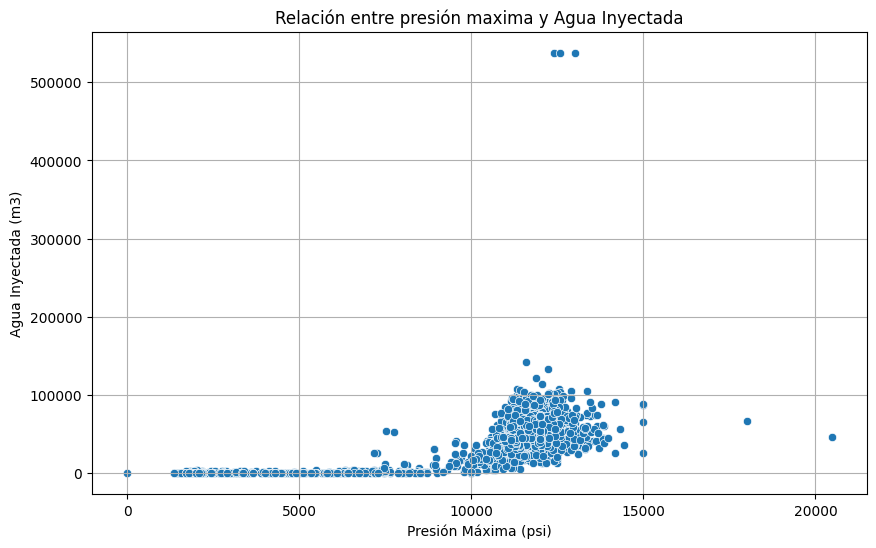

In [ ]:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pozos['presion_maxima_psi'], y=pozos['agua_inyectada_m3'])
    plt.title(f'Relación entre presión maxima y Agua Inyectada')
    plt.xlabel('Presión Máxima (psi)')
    plt.ylabel('Agua Inyectada (m3)')
    plt.grid(True)
    plt.show()

# Transformación de variables

In [ ]:
pozos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780 entries, 2 to 3752
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitud_rama_horizontal_m    1780 non-null   float64
 1   cantidad_fracturas            1780 non-null   int64  
 2   arena_bombeada_nacional_tn    1780 non-null   float64
 3   arena_bombeada_importada_tn   1780 non-null   float64
 4   presion_maxima_psi            1780 non-null   float64
 5   potencia_equipos_fractura_hp  1780 non-null   float64
 6   tipo_reservorio               1780 non-null   object 
 7   subtipo_reservorio            1780 non-null   object 
 8   tipo_terminacion              1780 non-null   object 
 9   fecha_inicio_fractura         1780 non-null   object 
 10  fecha_fin_fractura            1780 non-null   object 
 11  cuenca                        1780 non-null   object 
 12  yacimiento                    1780 non-null   object 
 13  formacio

In [ ]:
columnas_transf = pozos.select_dtypes(exclude=['object']).columns

transf = pd.get_dummies(pozos, columns = columnas_transf)

# Separación train y test
Elección de variables target (y) y variables (x)

In [ ]:
from sklearn.model_selection import train_test_split # para dividir datos

In [ ]:
caracteristicas = ['longitud_rama_horizontal_m',
                   'cantidad_fracturas',
                   'arena_bombeada_nacional_tn',
                   'arena_bombeada_importada_tn',
                   'presion_maxima_psi']

x = pozos[caracteristicas]
y = pozos['agua_inyectada_m3']

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modelo
1- Regresión lineal 2- Árbol de decisión 3- Random Forest

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# para entrenar modelo de regresion lineal
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
valores_faltantes= pozos.isnull().sum()
print(valores_faltantes)

longitud_rama_horizontal_m      0
cantidad_fracturas              0
arena_bombeada_nacional_tn      0
arena_bombeada_importada_tn     0
presion_maxima_psi              0
potencia_equipos_fractura_hp    0
tipo_reservorio                 0
subtipo_reservorio              0
tipo_terminacion                0
fecha_inicio_fractura           0
fecha_fin_fractura              0
cuenca                          0
yacimiento                      0
formacion_productiva            0
empresa_informante              0
agua_inyectada_m3               0
dtype: int64


In [ ]:
# @title Regresión lineal
# Inicializar el modelo de regresión lineal
model_lr = LinearRegression()

# Entrenar el modelo
model_lr.fit(x_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model_lr.predict(x_test)

# Calcular métricas de evaluación
r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f'R2 Score: {r2_lr:.4f}')
print(f'MSE: {mse_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')

R2 Score: 0.8059
MSE: 149889107.57
MAE: 8439.32


In [ ]:
# @title Árbol de decisión

from sklearn.tree import DecisionTreeRegressor
# para arboles de decision

In [ ]:
# Inicializar el modelo de árbol de decisión
model_ad = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model_ad.fit(x_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model_ad.predict(x_test)

# Calcular métricas de evaluación
r2_ad = r2_score(y_test, y_pred)
mse_ad = mean_squared_error(y_test, y_pred)
mae_ad = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f'R2 Score: {r2_ad:.4f}')
print(f'MSE: {mse_ad:.2f}')
print(f'MAE: {mae_ad:.2f}')

R2 Score: 0.0505
MSE: 733345779.36
MAE: 6200.58


In [ ]:
# @title Random Forest
# Inicializar el modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model_rf.fit(x_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model_rf.predict(x_test)

# Calcular métricas de evaluación
r2_rf = r2_score(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f'R2 Score: {r2_rf:.4f}')
print(f'MSE: {mse_rf:.2f}')

R2 Score: 0.2913
MSE: 547364691.25
